<a href="https://colab.research.google.com/github/ustab/Rehber_depo/blob/main/DataPreprocessing_condon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Condon usage Prediction

### Dataset Information:
We examined codon usage frequencies in the genomic coding DNA of a large sample of diverse organisms from different taxa tabulated in the CUTG database, where we further manually curated and harmonized these existing entries by re-classifying CUTG's bacteria (bct) class into archaea (arc), plasmids (plm), and bacteria proper (keeping with the original label bct'). The reclassification in the originalbct' domain was simplified by extracting from files qbxxx.spsum.txt' (where xxx = bct (bacteria), inv (invertebrates), mam (mammals), pln (plants), pri (primates), rod (rodents), vrt (vertebrates)) the different genus names of the entries, and making the classification by genus. There were 514 different genus names. The different genus categories were checked and relabeled asarc' where appropriate. In the eubacterial entries, the distinction was made of the bacterial genomes proper (keeping with the original label bct'), and bacterial plasmids (now labeledplm').

Following these preprocessing steps, the final dataset file comprises all entries of the CUTG databases qbxxx.spsum.txt in one text file. As detailed above, the qbbct.spsum.txt entries were separated as bct' (that is, eubacteria),plm' (plasmids), and `arc' (archaea), a distinction not originally made in the CUTG database.

## Description
Column 1: Kingdom
Column 2: DNAtype
Column 3: SpeciesID
Column 4: Ncodons
Column 5: SpeciesName
Columns 6-69: codon (header: nucleotide bases; entries: frequency of usage (5 digit floating point number))

The 'Kingdom' is a 3-letter code corresponding to `xxx' in the CUTG database name: 'arc'(archaea), 'bct'(bacteria), 'phg'(bacteriophage), 'plm' (plasmid), 'pln' (plant), 'inv' (invertebrate), 'vrt' (vertebrate), 'mam' (mammal), 'rod' (rodent), 'pri' (primate), and 'vrl'(virus) sequence entries. Note that the CUTG database does not contain 'arc' and 'plm' (these have been manually curated ourselves).

The 'DNAtype' is denoted as an integer for the genomic composition in the species: 0-genomic, 1-mitochondrial, 2-chloroplast, 3-cyanelle, 4-plastid, 5-nucleomorph, 6-secondary_endosymbiont, 7-chromoplast, 8-leucoplast, 9-NA, 10-proplastid, 11-apicoplast, and 12-kinetoplast.

The species identifier ('SpeciesID') is an integer, which uniquely indicates the entries of an organism. It is an accession identifier for each different species in the original CUTG database, followed by the first item listed in each genome.

The number of codons (`Ncodons') is the algebraic sum of the numbers listed for the different codons in an entry of CUTG. Codon frequencies are normalized to the total codon count, hence the number of occurrences divided by 'Ncodons' is the codon frequencies listed in the data file.

The species' name ('SpeciesName') is represented in strings purged of comma' (which are now replaced byspace'). This is a descriptive label of the name of the species for data interpretations.

Lastly, the codon frequencies ('codon') including 'UUU', 'UUA', 'UUG', 'CUU', etc., are recorded as floats (with decimals in 5 digits).

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


#### Read Data

In [2]:
data = pd.read_csv('/content/sample_data/benim dosyalar/codon_usage.csv')
data=data.set_index('SpeciesID')
data.head()

,Kingdom,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
SpeciesID,,,,,,,,,,,,,,,,,,,,,
100217,vrl,0,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
100220,vrl,0,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
100755,vrl,0,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
100880,vrl,0,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
100887,vrl,0,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [3]:
print('There are {} rows and {} columns in the data'.format(data.shape[0],data.shape[1]))

There are 13028 rows and 68 columns in the data


In [4]:
data.shape

(13028, 68)

In [5]:
data.columns

Index(['Kingdom', 'DNAtype', 'Ncodons', 'SpeciesName', 'UUU', 'UUC', 'UUA',
       'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU',
       'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA',
       'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG',
       'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG',
       'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC',
       'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG',
       'UGA'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13028 entries, 100217 to 9606
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   Ncodons      13028 non-null  int64  
 3   SpeciesName  13028 non-null  object 
 4   UUU          13028 non-null  object 
 5   UUC          13028 non-null  object 
 6   UUA          13028 non-null  float64
 7   UUG          13028 non-null  float64
 8   CUU          13028 non-null  float64
 9   CUC          13028 non-null  float64
 10  CUA          13028 non-null  float64
 11  CUG          13028 non-null  float64
 12  AUU          13028 non-null  float64
 13  AUC          13028 non-null  float64
 14  AUA          13028 non-null  float64
 15  AUG          13028 non-null  float64
 16  GUU          13028 non-null  float64
 17  GUC          13028 non-null  float64
 18  GUA          13028 non-null  float64
 19  

In [9]:
data.describe().T.style.background_gradient(cmap='BuPu')

,count,mean,std,min,25%,50%,75%,max
DNAtype,13028.000000,0.367209,0.688726,0.000000,0.000000,0.000000,1.000000,12.000000
Ncodons,13028.000000,79605.761283,719700.970711,1000.000000,1602.000000,2927.500000,9120.000000,40662582.000000
UUA,13028.000000,0.020637,0.020709,0.000000,0.005610,0.015260,0.029485,0.151330
UUG,13028.000000,0.014104,0.009280,0.000000,0.007108,0.013360,0.019810,0.101190
CUU,13028.000000,0.017820,0.010586,0.000000,0.010890,0.016130,0.022730,0.089780
CUC,13028.000000,0.018288,0.014572,0.000000,0.007830,0.014560,0.025112,0.100350
CUA,13028.000000,0.019044,0.024250,0.000000,0.005307,0.009685,0.017245,0.163920
CUG,13028.000000,0.018450,0.016578,0.000000,0.007180,0.012800,0.024315,0.107370
AUU,13028.000000,0.028352,0.017507,0.000000,0.016360,0.025475,0.038113,0.154060
AUC,13028.000000,0.025041,0.014600,0.000000,0.015130,0.021540,0.031860,0.088600


In [10]:
cat_columns = [col for col in data.columns if data[col].dtype=='O']
for col in cat_columns:
    print('Unique value for {}:'.format(col))
    print(data[col].unique())

Unique value for Kingdom:
['vrl' 'arc' 'bct' 'phg' 'plm' 'pln' 'inv' 'vrt' 'mam' 'rod' 'pri']
Unique value for SpeciesName:
['Epizootic haematopoietic necrosis virus' 'Bohle iridovirus'
 'Sweet potato leaf curl virus' ...
 'mitochondrion Pongo pygmaeus pygmaeus' 'Homo sapiens'
 'mitochondrion Homo sapiens']
Unique value for UUU:
['0.01654' '0.02714' '0.01974' ... 0.0138 0.01757 0.01778]
Unique value for UUC:
['0.01203' '0.01357' '0.0218' ... 0.02591 0.03446 0.03555]


In [12]:
## Columns is a float value with type object we have to change the data type
data['UUU']=data['UUU'].replace(['non-B hepatitis virus','12;I'],'NaN')
data['UUC']=data['UUC'].replace('-','NaN')
data['UUU'] = data['UUU'].astype('float32')
data['UUC'] = data['UUC'].astype('float32')


In [16]:
data.head(1)

,Kingdom,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
SpeciesID,,,,,,,,,,,,,,,,,,,,,
100217,vrl,0,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.0005,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.0005,0.0


In [13]:
data.isnull().sum().sort_values(ascending=False)[:5]

UUU        2
UUC        1
Kingdom    0
UAU        0
UGU        0
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data['Kingdom'].value_counts()

bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

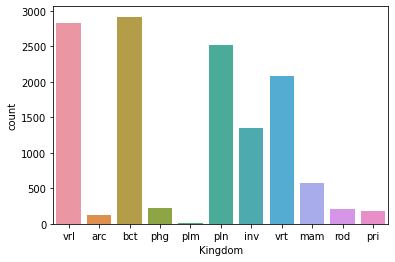

In [19]:
sns.countplot(data['Kingdom'])

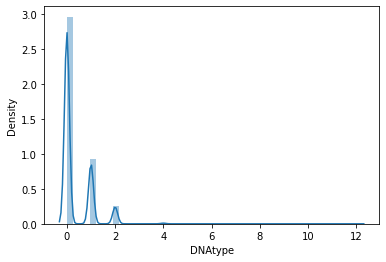

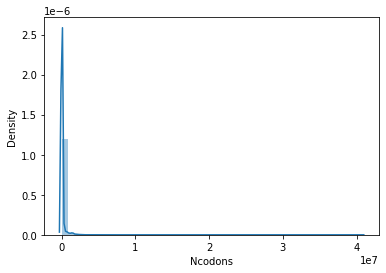

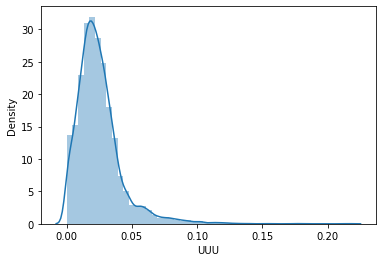

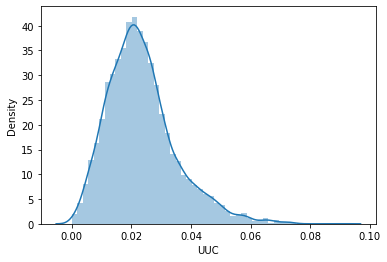

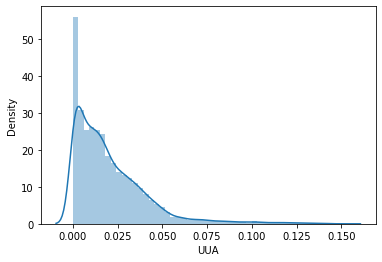

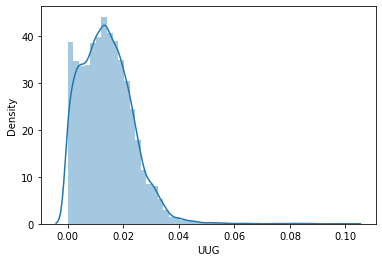

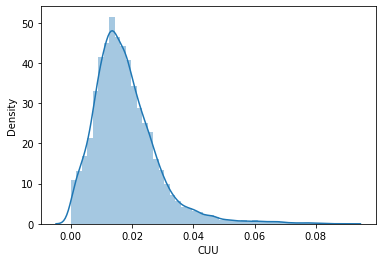

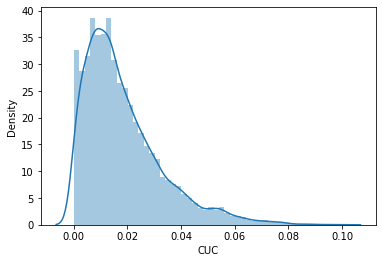

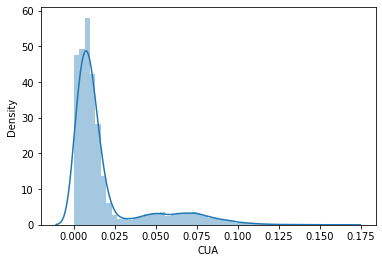

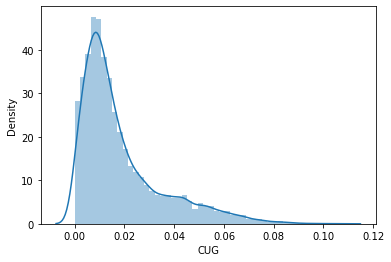

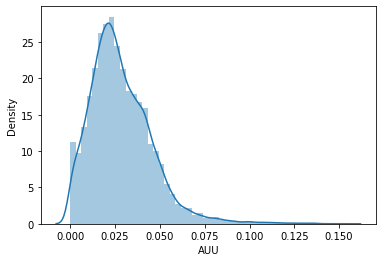

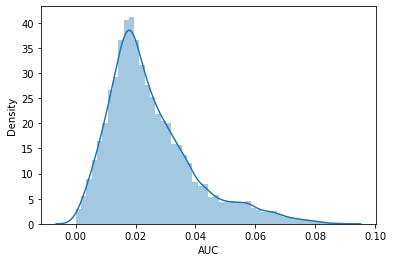

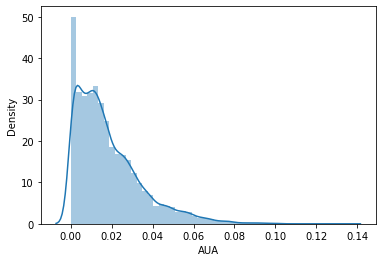

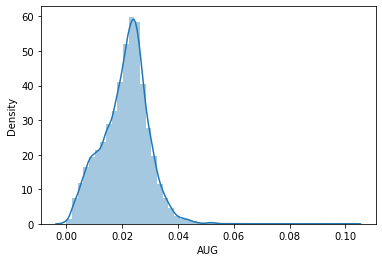

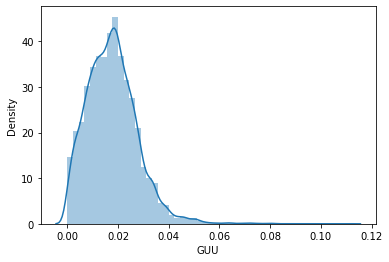

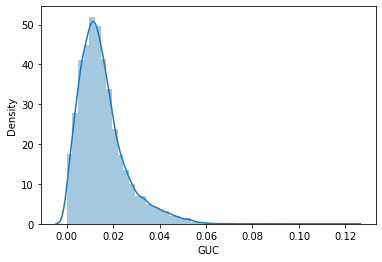

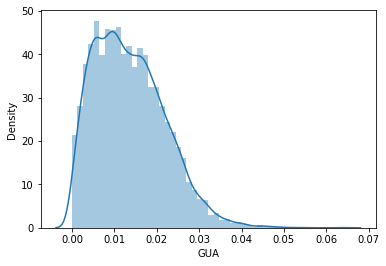

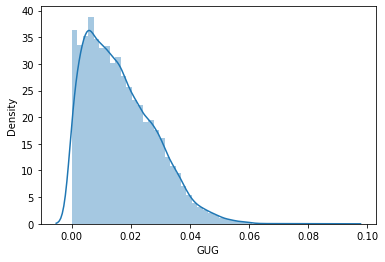

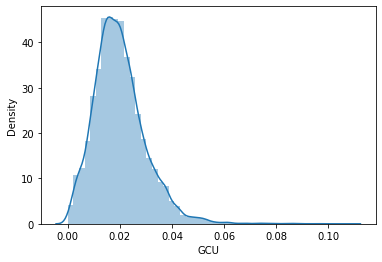

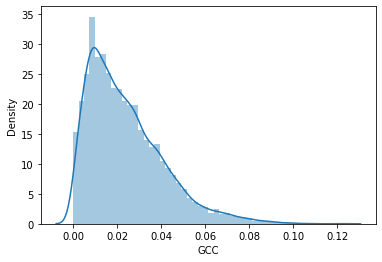

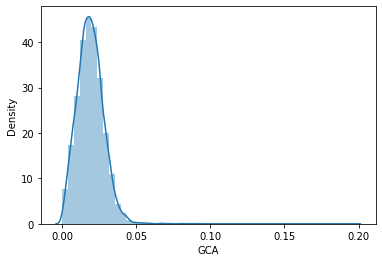

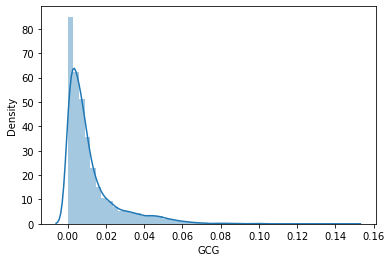

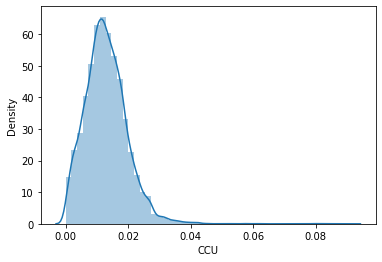

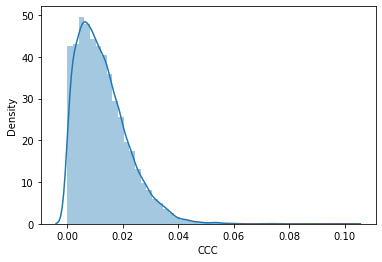

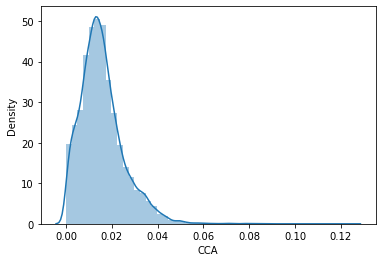

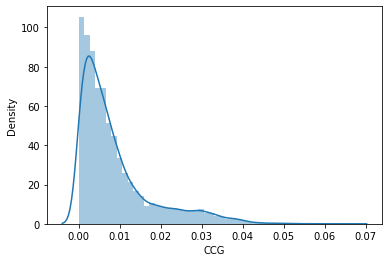

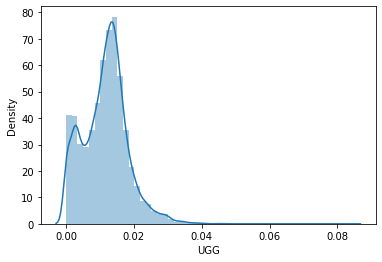

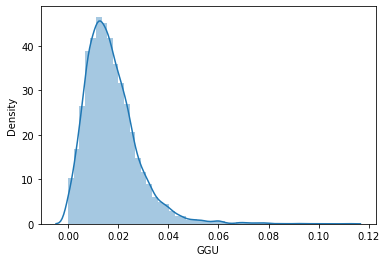

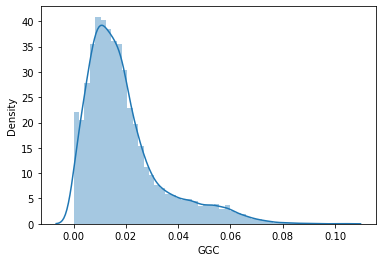

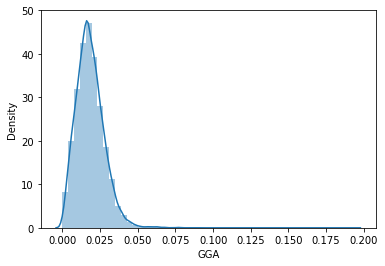

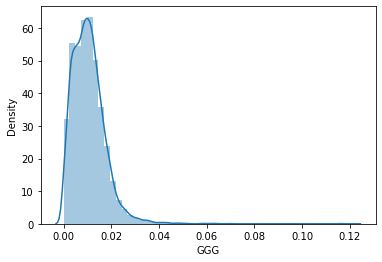

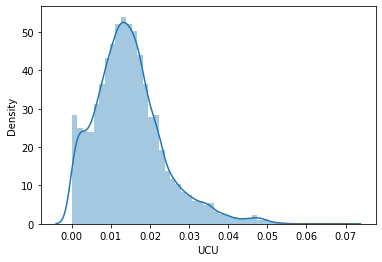

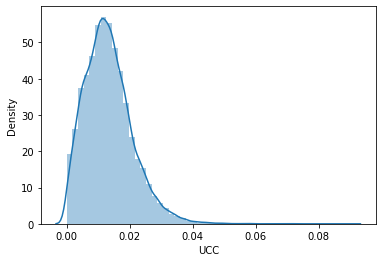

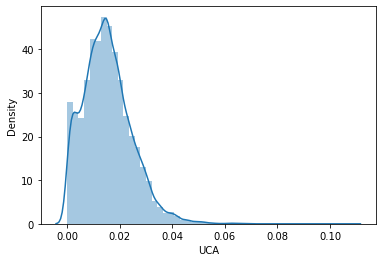

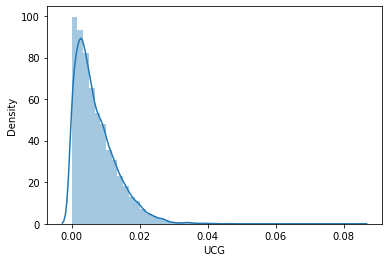

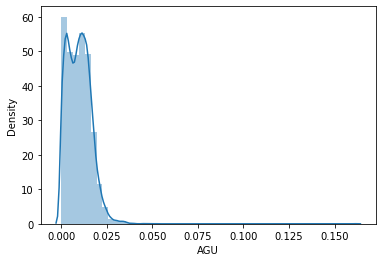

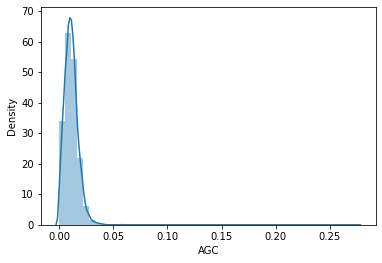

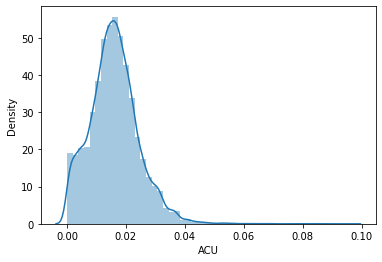

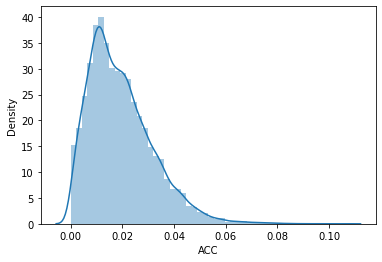

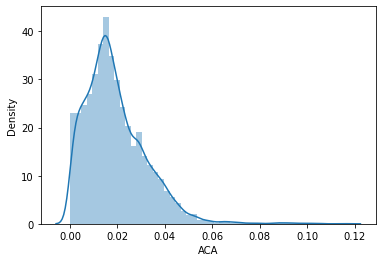

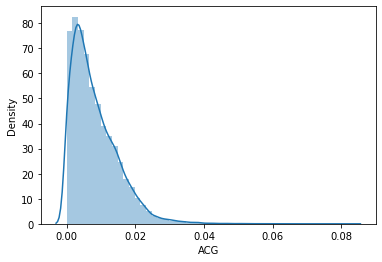

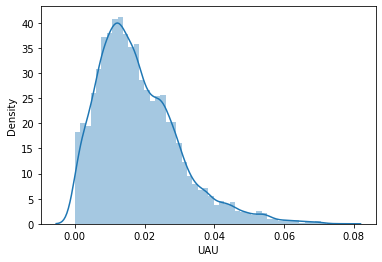

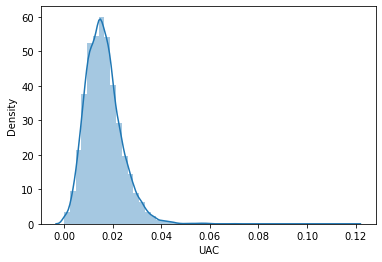

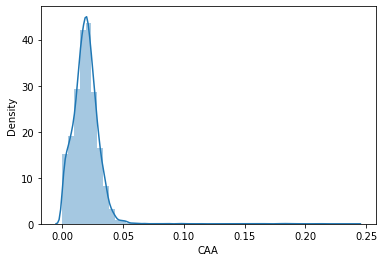

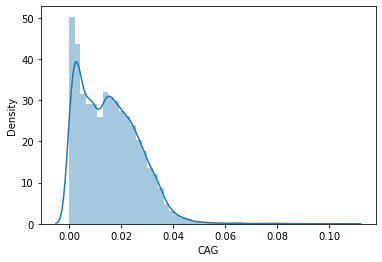

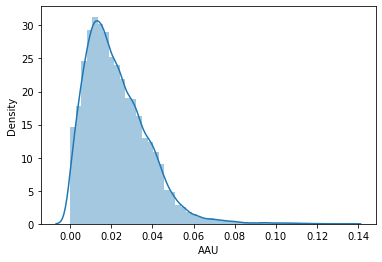

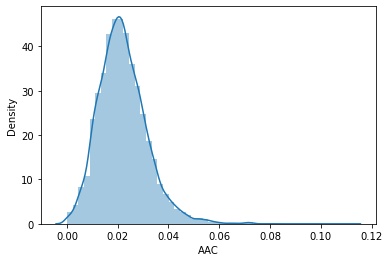

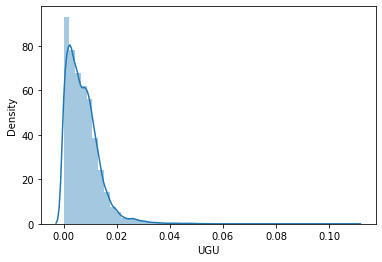

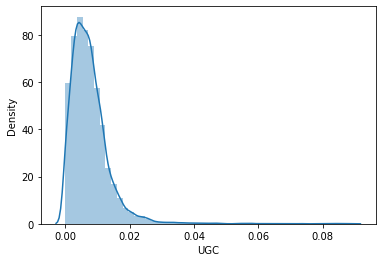

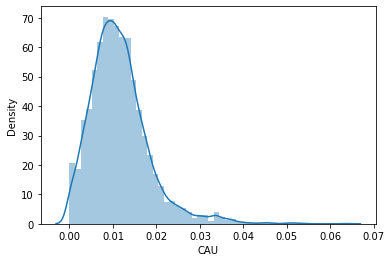

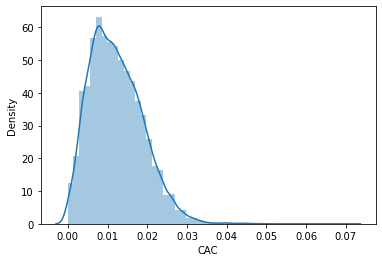

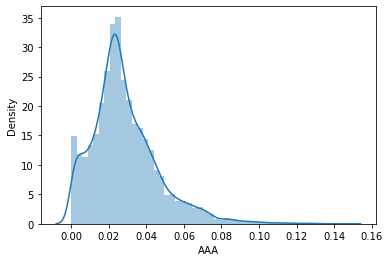

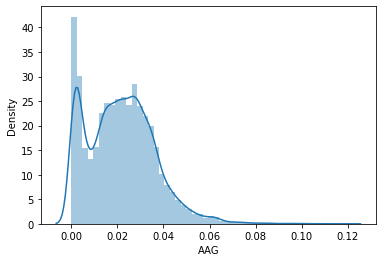

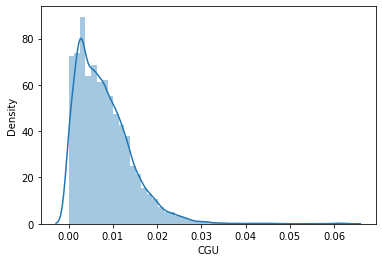

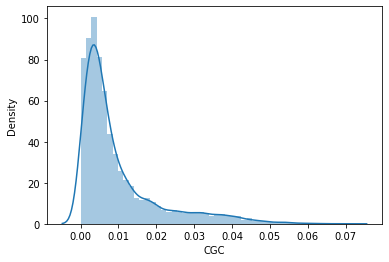

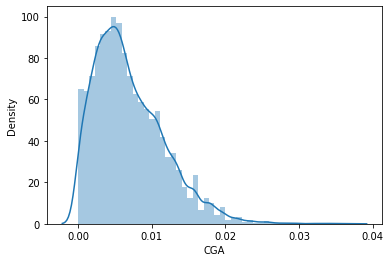

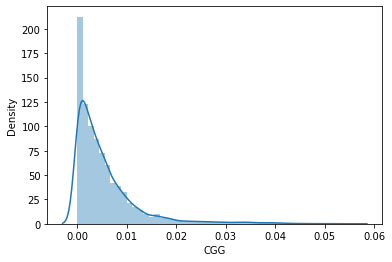

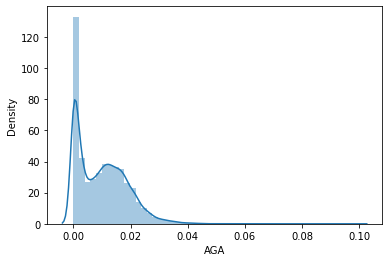

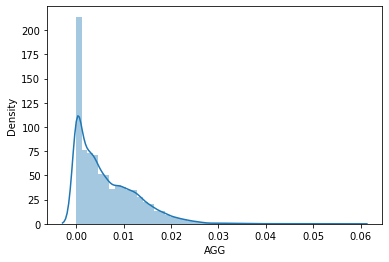

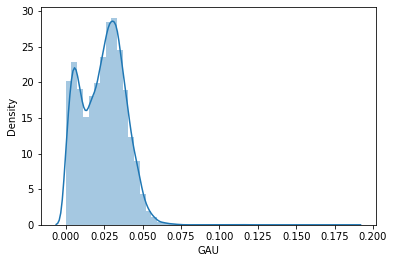

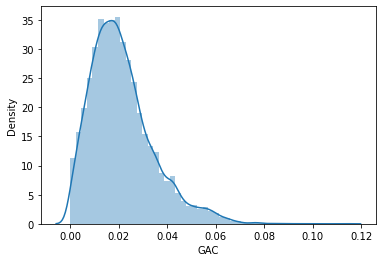

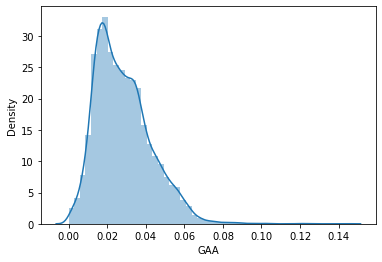

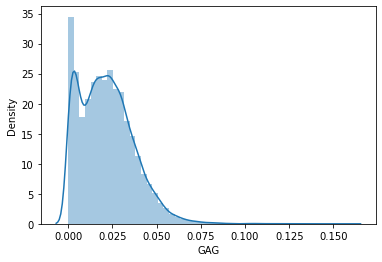

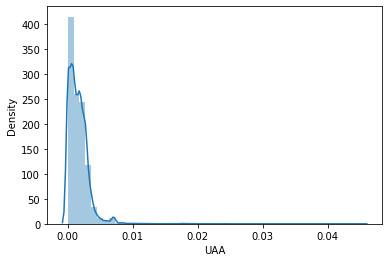

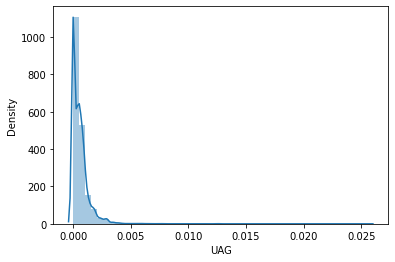

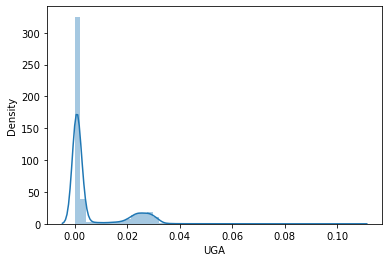

In [20]:
num_columns = [col for col in data.columns if data[col].dtype!='O']
for col in num_columns:
    sns.distplot(data[col])
    plt.show()

In [21]:
X = data.drop(['Kingdom','SpeciesName'], axis=1)
y=data['Kingdom']

### Split Data into train and test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(10420, 66) (2606, 66)
(10420,) (2606,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
y_pred=classifier.predict(X_test)
y_pred

array(['pln', 'arc', 'bct', ..., 'arc', 'vrl', 'pln'], dtype=object)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:
confusion_matrix(y_test,y_pred)

array([[ 10,  10,   2,   0,   0,   0,   0,   0,   0,   1,   0],
       [  1, 565,   0,   0,   1,   0,   4,   0,   0,   3,   0],
       [  0,   5, 197,   0,   0,   0,  28,   0,   0,  21,   6],
       [  0,   1,   1, 106,   0,   0,   0,   6,   1,   2,   9],
       [  1,  12,   0,   0,  20,   0,   0,   0,   0,   5,   0],
       [  0,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   9,   1,   0,   0,   0, 499,   0,   0,  21,   0],
       [  0,   0,   0,   4,   0,   0,   0,  21,   0,   3,   4],
       [  0,   0,   1,  10,   0,   0,   0,   4,  25,   1,  10],
       [  0,   6,   2,   0,   0,   0,   7,   0,   0, 519,   1],
       [  0,   2,   5,   0,   0,   0,   4,   1,   0,   7, 416]])

In [32]:
accuracy_score(y_test,y_pred)

0.9125095932463546